Energy is two things, for magnets:

(1) external field

$$
E_{external} = -\mu H \sum_{i=1,N}s_i
$$

(2) interaction term

$$
E_{interaction} = -J \sum_{\mathrm{pairs }<ij>}s_i s_j
$$

Total energy:

$$
E = -\mu H \sum_{i=1,N}s_i -J \sum_{\mathrm{pairs }<ij>}s_i s_j
$$

In [2]:
import numpy as np, pandas as pd, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random # import only one function
from numpy.random import randint

In [3]:
width = 3
state = random(size=(width,width))

In [4]:
T = 2.5

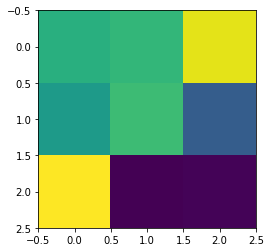

In [5]:
plt.imshow(state)

In [6]:
state[state<=0.5] = -1
state[state>0.5] = 1

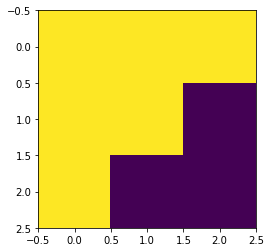

In [7]:
plt.imshow(state)

In [8]:
mu = 1
H = 1
J = 1 # positive if ferromagnetic, negative if antiferromagnetic

def energy_ext(state):
    return - mu*H*np.sum(state)

In [9]:
energy_ext(state)

-3.0

Now, flip things at random

In [10]:
i,j = randint(width), randint(width)
new_state = state.copy()
new_state[i,j] = new_state[i,j]*-1

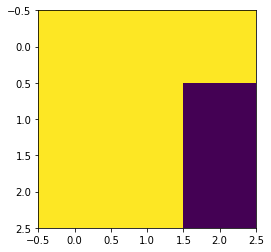

In [11]:
plt.imshow(new_state)

In [12]:
energy_ext(new_state)

-5.0

So, basic strategy is

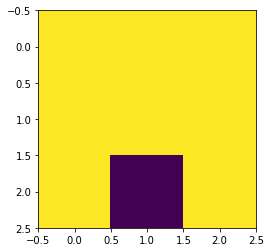

In [13]:
ntrials = 10
im = plt.imshow(state)
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    if energy_ext(new_state) < energy_ext(state):
        state = new_state
    else:
        state = state
    im.set_data(state)
    plt.imshow(state)

Now, temperature.

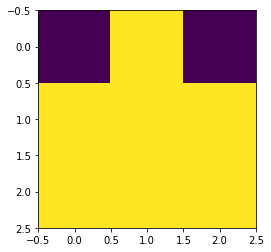

In [14]:
ntrials = 10
im = plt.imshow(state)
T = 10.01
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = energy_ext(new_state) - energy_ext(state)
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
    im.set_data(state)
    plt.imshow(state)

Let's make it bigger

In [15]:
width = 40
state = random(size=(width,width))
state[state<=0.5] = -1
state[state>0.5] = 1

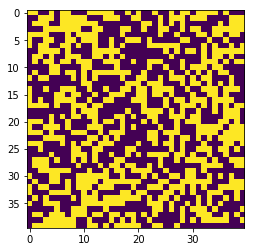

In [16]:
ntrials = 10
im = plt.imshow(state)
T = 10.01
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = energy_ext(new_state) - energy_ext(state)
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
    im.set_data(state)
    plt.imshow(state)

In [17]:
def energy_int(state):
    return -np.sum(
        J * state * np.roll(state, 1, axis=0) +
        J * state * np.roll(state, -1, axis=0) +
        J * state * np.roll(state, 1, axis=1) +
        J * state * np.roll(state, -1, axis=1)
    )/2

In [18]:
energy_int(state)

-24.0

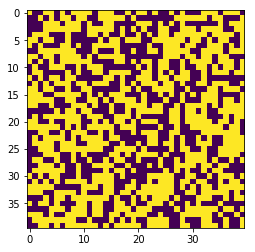

In [19]:
ntrials = 1000
plt.imshow(state)
T = 5.01
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = (energy_ext(new_state) + energy_int(new_state)) - (energy_ext(state) + energy_int(new_state))
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
plt.imshow(state)

In [20]:
def runIsing(ntrials,state,T):
    for ntrial in range(ntrials):
        i,j = randint(width), randint(width)
        new_state = state.copy()
        new_state[i,j] = new_state[i,j]*-1
        energy = energy_ext(state) + energy_int(state)
        energy_new = energy_ext(new_state) + energy_int(new_state)
        energy_change = energy_new - energy
        if energy_change <= 0:
            state = new_state
        else:
            if random() < np.exp(-energy_change/T):
                state = new_state
            else:
                state = state
            state = state
    plt.imshow(state)

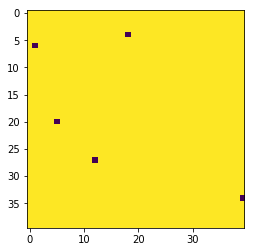

In [21]:
runIsing(10000,state,T=1)

In [22]:
def runIsing(ntrials,state,T):
    energies = []
    for ntrial in range(ntrials):
        i,j = randint(width), randint(width)
        new_state = state.copy()
        new_state[i,j] = new_state[i,j]*-1
        energy = energy_ext(state) + energy_int(state)
        energy_new = energy_ext(new_state) + energy_int(new_state)
        energy_change = energy_new - energy
        if energy_change <= 0:
            state = new_state
        else:
            if random() < np.exp(-energy_change/T):
                state = new_state
            else:
                state = state
            state = state
        energies.append(energy_ext(state) + energy_int(state))
    plt.imshow(state)
    fig,ax = plt.subplots()
    ax.plot(energies)
    plt.xlabel('trial number')
    plt.ylabel('energy')

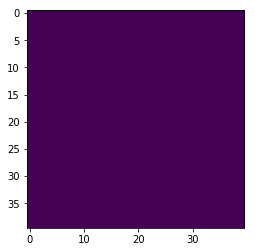

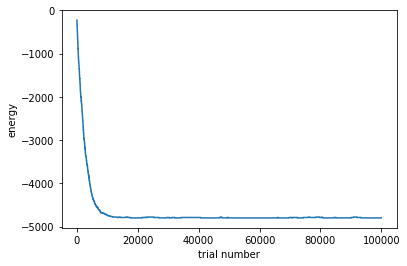

In [23]:
runIsing(100000,state,T=1.1)

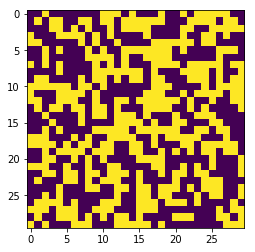

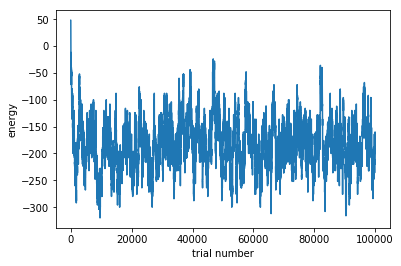

In [270]:
runIsing(100000,state,T=10)

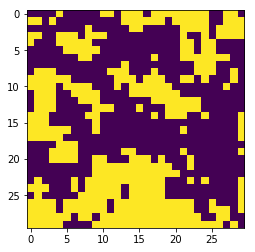

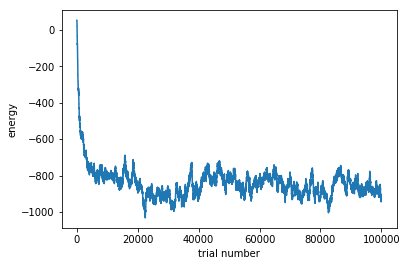

In [268]:
J=1
runIsing(100000,state,T=2.7)

Time for you to play:

* see if you can see effects of changing strength of interaction 
* strength of external field
* effect of temperature

In [1]:
runIsing(10000,state,T=1)

NameError: name 'runIsing' is not defined

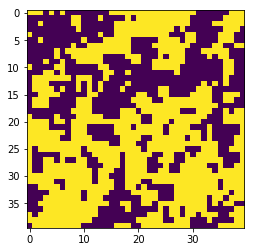

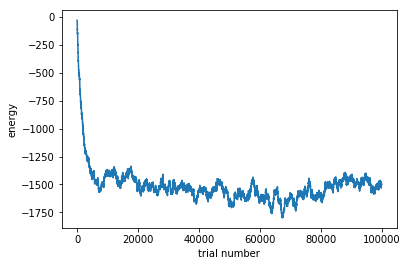

In [26]:
J=1
H = 0
runIsing(100000,state,T=2.7)